In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw08.ipynb")

### Homework 8: Confidence Intervals

**Helpful Resource:**
- [Python Reference](http://data8.org/fa21/python-reference.html): Cheat sheet of helpful array & table methods used in Data 8!

**Recommended Reading**: 
* [Estimation](https://www.inferentialthinking.com/chapters/13/Estimation)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to setup the notebook by importing some helpful libraries. Each time you start your server, you will need to execute this cell again.

For all problems that you must write explanations and sentences for, you **must** provide your answer in the designated space. **Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook!** For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you will fail tests that you thought you were passing previously!

**Deadline:**

This assignment is due Thursday, 10/28 at 11:59pm PT. Turn it in by Wednesday 11:59pm PT for 5 extra credit points. Late work will not be accepted as per the [policies](http://data8.org/fa21/policies.html) page.


**Note: This homework has hidden tests on it. That means even though tests may say 100% passed, it doesn't mean your final grade will be 100%. We will be running more tests for correctness once everyone turns in the homework.**


Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the policies page to learn more about how to learn cooperatively.

You should start early so that you have time to get help if you're stuck. Office hours are held Monday-Friday. The schedule appears on [http://data8.org/fa21/office-hours.html](http://data8.org/fa21/office-hours.html).

In [2]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *
import d8error

# These lines do some fancy plotting magic.",
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## 1. Thai Restaurants in Berkeley

Ben and Frank are trying to see what the best Thai restaurant in Berkeley is. They survey 1,500 UC Berkeley students selected uniformly at random, and ask each student what Thai restaurant is the best. (*Note: This data is fabricated for the purposes of this homework.*) The choices of Thai restaurants are Lucky House, Imm Thai, Thai Temple, and Thai Basil. After compiling the results, Ben and Frank release the following percentages from their sample:

|Thai Restaurant  | Percentage|
|:------------:|:------------:|
|Lucky House | 8% |
|Imm Thai | 53% |
|Thai Temple | 25% |
|Thai Basil | 14% |

These percentages represent a uniform random sample of the population of UC Berkeley students. We will attempt to estimate the corresponding *parameters*, or the percentage of the votes that each restaurant will receive from the population (i.e. all UC Berkeley students). We will use confidence intervals to compute a range of values that reflects the uncertainty of our estimates.

The table `votes` contains the results of Ben and Frank's survey.

In [3]:
# Just run this cell
votes = Table.read_table('votes.csv')
votes

Vote
Lucky House
Lucky House
Lucky House
Lucky House
Lucky House
Lucky House
Lucky House
Lucky House
Lucky House
Lucky House


**Question 1.1.** Complete the function `one_resampled_percentage` below. It should return Imm Thai's **percentage** of votes after taking the original table (`tbl`) and performing one bootstrap sample of it. Reminder that a percentage is between 0 and 100. **(9 Points)**

*Note:* `tbl` will always be in the same format as `votes`.

<!--
BEGIN QUESTION
name: q1_1
manual: false
points:
 - 0
 - 0
 - 2
 - 7
-->

In [4]:
def one_resampled_percentage(tbl):
    resampled_tbl = tbl.sample()
    num_imm = resampled_tbl.where('Vote', 'Imm Thai').num_rows
    return num_imm / tbl.num_rows * 100

one_resampled_percentage(votes)

53.46666666666666

In [5]:
grader.check("q1_1")

q1_1 results: All test cases passed!

**Question 1.2.** Complete the `percentages_in_resamples` function such that it simulates and returns an array of 2021 bootstrapped estimates of the percentage of voters who will vote for Imm Thai. You should use the `one_resampled_percentage` function you wrote above. **(9 Points)**

#### **Important Note:** There are no public tests for this question, so the autograder cell below will always return 100% passed. 

<!--
BEGIN QUESTION
name: q1_2
manual: false
points:
 - 0
 - 4
 - 5
-->

In [9]:
def percentages_in_resamples():
    percentage_imm = make_array()
    for i in np.arange(2021):
        percentage_imm = np.append(percentage_imm, one_resampled_percentage(votes))
    return percentage_imm

In [10]:
grader.check("q1_2")

q1_2 results: All test cases passed!

In the following cell, we run the function you just defined, `percentages_in_resamples`, and create a histogram of the calculated statistic for the 2021 bootstrap estimates of the percentage of voters who voted for Imm Thai. 

*Note:* This might take a few seconds to run.

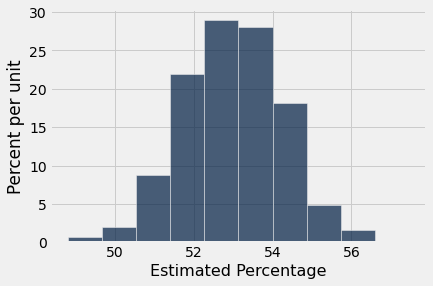

In [11]:
resampled_percentages = percentages_in_resamples()
Table().with_column('Estimated Percentage', resampled_percentages).hist("Estimated Percentage")

**Question 1.3.** Using the array `resampled_percentages`, find the values at the two edges of the middle 95% of the bootstrapped percentage estimates. (Compute the lower and upper ends of the interval, named `imm_lower_bound` and `imm_upper_bound`, respectively.) **(9 Points)**

*Hint:* If you are stuck on this question, try looking over [Chapter 13](https://inferentialthinking.com/chapters/13/Estimation.html) of the textbook.

<!--
BEGIN QUESTION
name: q1_3
manual: false
points:
 - 0
 - 9
-->

In [12]:
imm_lower_bound = percentile(2.5, resampled_percentages)
imm_upper_bound = percentile(97.5, resampled_percentages)
print(f"Bootstrapped 95% confidence interval for the percentage of Imm Thai voters in the population: [{imm_lower_bound:.2f}, {imm_upper_bound:.2f}]")

Bootstrapped 95% confidence interval for the percentage of Imm Thai voters in the population: [50.53, 55.40]


In [13]:
grader.check("q1_3")

q1_3 results: All test cases passed!

**Question 1.4.** The survey results seem to indicate that Imm Thai is beating all the other Thai restaurants combined among voters. We would like to use confidence intervals to determine a range of likely values for Imm Thai's true lead over all the other restaurants combined. The calculation for Imm Thai's lead over Lucky House, Thai Temple, and Thai Basil combined is:

$$\text{Imm Thai's % of the vote} - (\text{100 %} - \text{Imm Thai's % of Vote})$$

Define the function `one_resampled_difference` that returns **exactly one value** of Imm Thai's percentage lead over Lucky House, Thai Temple, and Thai Basil combined from one bootstrap sample of `tbl`. **(9 Points)**

*Hint 1:* Imm Thai's lead can be negative.

*Hint 2:* Given a table of votes, how can you figure out what percentage of the votes are for a certain restaurant? **Be sure to use percentages, not proportions, for this question!**

<!--
BEGIN QUESTION
name: q1_4
manual: false
points:
 - 0
 - 9
-->

In [14]:
def one_resampled_difference(tbl):
    bootstrap = tbl.sample()
    imm_percentage = bootstrap.where('Vote', 'Imm Thai').num_rows / tbl.num_rows * 100
    return imm_percentage - (100 - imm_percentage)

In [15]:
grader.check("q1_4")

q1_4 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 1.5.** Write a function called `leads_in_resamples` that finds 2021 bootstrapped estimates (the result of calling `one_resampled_difference`) of Imm Thai's lead over Lucky House, Thai Temple, and Thai Basil combined. Plot a histogram of the resulting samples. **(9 Points)**

*Hint:* If you see an error involving “NoneType”, consider what components a function needs to have. 

<!--
BEGIN QUESTION
name: q1_5
manual: true
-->

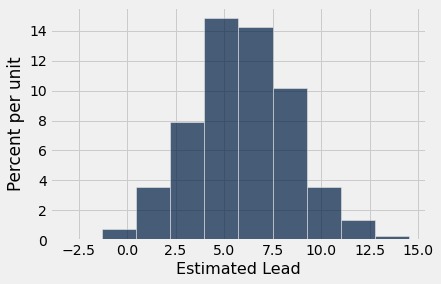

In [16]:
def leads_in_resamples():
    percentage_imm = make_array()
    for i in np.arange(2021):
        percentage_imm = np.append(percentage_imm, one_resampled_difference(votes))
    return percentage_imm

sampled_leads = leads_in_resamples()
Table().with_column('Estimated Lead', sampled_leads).hist("Estimated Lead")

<!-- END QUESTION -->

**Question 1.6.** Use the simulated data in `sampled_leads` from Question 1.5 to compute an approximate 95% confidence interval for Imm Thai's true lead over Lucky House, Thai Temple, and Thai Basil combined. **(9 Points)**

<!--
BEGIN QUESTION
name: q1_6
manual: false
points:
 - 0
 - 2
 - 7
-->

In [17]:
diff_lower_bound = percentile(2.5, sampled_leads)
diff_upper_bound = percentile(97.5, sampled_leads)
print("Bootstrapped 95% confidence interval for Imm Thai's true lead over Lucky House, Thai Temple, and Thai Basil combined: [{:f}%, {:f}%]".format(diff_lower_bound, diff_upper_bound))

Bootstrapped 95% confidence interval for Imm Thai's true lead over Lucky House, Thai Temple, and Thai Basil combined: [1.066667%, 11.200000%]


In [18]:
grader.check("q1_6")

q1_6 results: All test cases passed!

## 2. Interpreting Confidence Intervals 

The staff computed the following 95% confidence interval for the percentage of Imm Thai voters: 

$$[50.53, 55.53]$$

(Your answer may have been a bit different due to randomness; that doesn't mean it was wrong!)

<!-- BEGIN QUESTION -->

**Question 2.1.** The staff also created 70%, 90%, and 99% confidence intervals from the same sample, but we forgot to label which confidence interval represented which percentages! First, match each confidence level (70%, 90%, 99%) with its corresponding interval in the cell below (e.g. __ % CI: [52.1, 54] $\rightarrow$ replace the blank with one of the three confidence levels). **Then**, explain your thought process and how you came up with your answers. **(10 Points)**

The intervals are below:

* [50.03, 55.94]
* [52.1, 54]
* [50.97, 54.99]


<!--
BEGIN QUESTION
name: q2_1
manual: true
-->

* 99% Cl: [50.03, 55.94]
* 70% Cl: [52.1, 54]
* 90% Cl: [50.97, 54.99]

<!-- END QUESTION -->

**Question 2.2.** Suppose we produced 6,000 new samples (each one a uniform random sample of 1,500 voters/students) from the population and created a 95% confidence interval from each one. Roughly how many of those 6,000 intervals do you expect will actually contain the true percentage of the population? **(9 Points)**

Assign your answer to `true_percentage_intervals`.

<!--
BEGIN QUESTION
name: q2_2
manual: false
points:
 - 0
 - 9
-->

In [19]:
true_percentage_intervals = 0.95 * 6000

In [20]:
grader.check("q2_2")

q2_2 results: All test cases passed!

Recall the second bootstrap confidence interval you created, which estimated Imm Thai's lead over Lucky House, Thai Temple, and Thai Basil combined. Among
voters in the sample, Imm Thai's lead was 6%. The staff's 95% confidence interval for the true lead (in the population of all voters) was:

$$[1.2, 11.2]$$

Suppose we are interested in testing a simple yes-or-no question:

> "Is the percentage of votes for Imm Thai equal to the percentage of votes for Lucky House, Thai Temple, and Thai Basil combined?"

Our null hypothesis is that the percentages are equal, or equivalently, that Imm Thai's lead is exactly 0. Our alternative hypothesis is that Imm Thai's lead is not equal to 0.  In the questions below, don't compute any confidence interval yourself - use only the staff's 95% confidence interval.

**Question 2.3.** Say we use a 5% p-value cutoff. Do we reject the null, fail to reject the null, or are we unable to tell using the staff's confidence interval? **(9 Points)**

Assign `restaurants_equal` to the number corresponding to the correct answer.

1. Reject the null / Data is consistent with the alternative hypothesis
2. Fail to reject the null / Data is consistent with the null hypothesis
3. Unable to tell using our staff confidence interval

*Hint:* Consider the relationship between the p-value cutoff and confidence. If you're confused, take a look at [this chapter](https://inferentialthinking.com/chapters/13/4/Using_Confidence_Intervals.html) of the textbook.

<!--
BEGIN QUESTION
name: q2_3
manual: false
points:
 - 0
 - 0
 - 0
 - 9
-->

In [21]:
restaurants_equal = 1

In [22]:
grader.check("q2_3")

q2_3 results: All test cases passed!

**Question 2.4.** What if, instead, we use a P-value cutoff of 1%? Do we reject the null, fail to reject the null, or are we unable to tell using our staff confidence interval? **(9 Points)**

Assign `cutoff_one_percent` to the number corresponding to the correct answer.

1. Reject the null / Data is consistent with the alternative hypothesis
2. Fail to reject the null / Data is consistent with the null hypothesis
3. Unable to tell using our staff confidence interval

<!--
BEGIN QUESTION
name: q2_4
manual: false
points:
 - 0
 - 9
-->

In [23]:
cutoff_one_percent = 3

In [24]:
grader.check("q2_4")

q2_4 results: All test cases passed!

**Question 2.5.** What if we use a p-value cutoff of 10%? Do we reject, fail to reject, or are we unable to tell using our confidence interval? **(9 Points)**

Assign `cutoff_ten_percent` to the number corresponding to the correct answer.

1. Reject the null / Data is consistent with the alternative hypothesis
2. Fail to reject the null / Data is consistent with the null hypothesis
3. Unable to tell using our staff confidence interval

<!--
BEGIN QUESTION
name: q2_5
manual: false
points:
 - 0
 - 9
-->

In [25]:
cutoff_ten_percent = 1

In [26]:
grader.check("q2_5")

q2_5 results: All test cases passed!

You're done with Homework 8!  

**Important submission steps:** 
1. Run the tests and verify that they all pass.
2. Choose **Save and Checkpoint** from the **File** menu, then **run the final cell**. 
3. Click the link to download the zip file.
4. Go to [Gradescope](https://www.gradescope.com/courses/288788) and submit the zip file to the corresponding assignment. The name of this assignment is "Homework 8 Autograder". 

**It is your responsibility to make sure your work is saved before running the last cell.**

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [27]:
grader.check_all()

q1_1 results: All test cases passed!

q1_2 results: All test cases passed!

q1_3 results: All test cases passed!

q1_4 results: All test cases passed!

q1_6 results: All test cases passed!

q2_2 results: All test cases passed!

q2_3 results: All test cases passed!

q2_4 results: All test cases passed!

q2_5 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, force_save=True)

<IPython.core.display.Javascript object>